In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
terms = pd.read_csv('data/terms.tsv', sep='\t')
# terms = terms[['Stem','Main form', 'Forms']]
terms

,Stem,Main form,Forms,n,C-value,Gfidf,Specificity chi2,Occurrences,Cooccurrences,"type ""w"" for a term to be ignored"
0,carbon footprint,carbon footprint,carbon footprint|&|Carbon footprint|&|carbon f...,2,462.649977,1.373832,457.680742,214.0,1313.0,
1,blockchain technolog,blockchain technology,blockchain technology|&|Blockchain technology|...,2,262.797776,1.757895,290.722774,95.0,542.0,
2,literatur review systemat,systematic literature review,systematic literature review|&|Systematic lite...,3,393.170938,1.036649,2746.161742,191.0,1328.0,
3,distribut system,distribution system,distribution system|&|distribution systems,2,220.309513,1.250000,605.819666,125.0,710.0,
4,manag system,management system,management system|&|management systems|&|syste...,2,368.231614,1.141463,329.630806,224.0,1488.0,
...,...,...,...,...,...,...,...,...,...,...
195,cycl life,life cycle,life cycle|&|Life cycle|&|Life Cycle|&|life cy...,2,915.858117,1.257019,7824.416699,976.0,5777.0,
196,measur perform,performance measurement,performance measurement|&|performance measures...,2,509.859158,1.311741,425.381465,259.0,1659.0,
197,optim particl swarm,particle swarm optimization,particle swarm optimization|&|Particle Swarm O...,3,204.528316,1.084211,4852.065571,95.0,893.0,
198,linear mixed-integ program,mixed-integer linear programming,mixed-integer linear programming,3,113.185573,1.055556,985.900664,54.0,547.0,


In [3]:
terms_dict = dict(zip(terms["Main form"], terms["Forms"].apply(lambda string: string.split("|&|"))))
terms_dict

{'carbon footprint': ['carbon footprint',
  'Carbon footprint',
  'carbon footprints'],
 'blockchain technology': ['blockchain technology',
  'Blockchain technology',
  'Blockchain as a technology'],
 'systematic literature review': ['systematic literature review',
  'Systematic literature review',
  'systematic review of the literature',
  'systematic review of literature'],
 'distribution system': ['distribution system', 'distribution systems'],
 'management system': ['management system',
  'management systems',
  'system management',
  'systems management'],
 'value creation': ['value creation', 'creation of value'],
 'energy sources': ['energy sources', 'energy source', 'source of energy'],
 'construction projects': ['construction projects', 'construction project'],
 'customer service': ['customer service', 'service customer'],
 'energy consumption': ['energy consumption', 'consumption of energy'],
 'critical success factors': ['critical success factors',
  'Critical success factor

In [7]:
# Corpus Explorer.csv is a file obtained after running the "Corpus Explorer" script in CorText after \
# running the term extraction algorithm.
db = pd.read_csv('data/Corpus Explorer.csv')
db = db[["Terms","title", "year"]]
db["Terms"] = db["Terms"].fillna("nan")
db

,Terms,title,year
0,chain management *** Analytic hierarchy proces...,UNDERSTANDING AND MEASURING MACRO-INSTITUTIONA...,2008
1,sensitivity analysis *** case study *** decisi...,Comprehensive assessment of flexibility of the...,2015
2,decision making,Determining semi-finished products to be stock...,2007
3,decision making *** multi-criteria decision **...,Product-process connect in a regenerative inno...,2013
4,decision making *** decision making *** concep...,"Essay on conceptual modeling, analysis and ill...",2008
...,...,...,...
9321,nan,Byproduct surplus: Lighting the depreciative e...,2020
9322,nan,Sexual harassment in an east African agribusin...,2015
9323,nan,Postponement production strategy under disrupt...,2015
9324,nan,Supply network disruption and resilience: A ne...,2015


In [9]:
selected_terms ={
    "Analytic": ["mathematical model", "Multi-objective optimization", "data envelopment analysis",
                    "mixed integer", "linear programming model", "objective function", "optimization model",
                    "mixed-integer linear programming"],
    "AI": ["particle swarm optimization", "genetic algorithm",
                                             "fuzzy set theory"],
     "Simulation" : ["simulation model", "simulation results"]
                 }


In [10]:
db_all = pd.DataFrame()
for key, terms in selected_terms.items():
    db_selected = pd.DataFrame()
    for term in terms:
        db_selected = pd.concat([db_selected, db[db["Terms"].str.contains(term)]])
    db_selected = db_selected.drop_duplicates().reset_index(drop=True)
    db_selected['key'] = key
    db_all = pd.concat([db_all, db_selected])

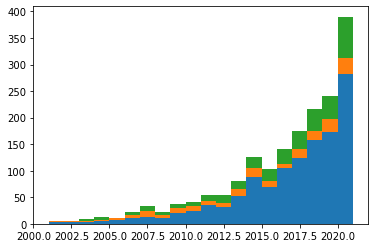

In [8]:
fig = plt.figure()
ax = fig.subplots(1,1)
ax.hist([db_all[db_all['key'] == "Analytic"]['year'],
         db_all[db_all['key'] == "Simulation"]['year'],
         db_all[db_all['key'] == "AI"]['year']],bins=20,
        stacked=True)
plt.show()

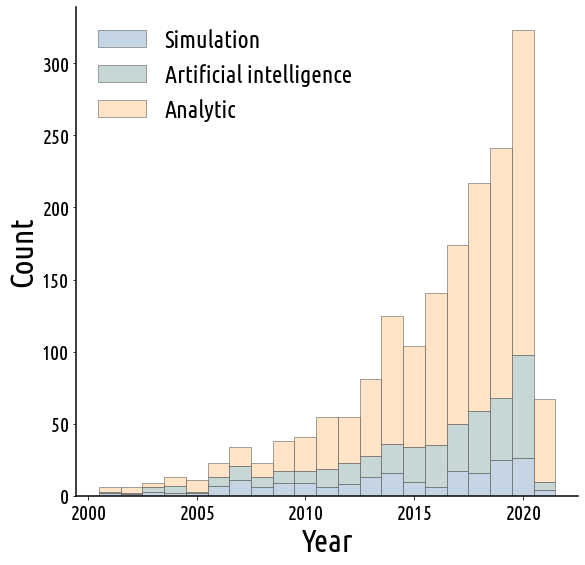

In [13]:
color = ["#ffdbb644", "#b3cac744","#b4c7dc44"]
fig = plt.figure(figsize=(9,9))
plt.rcParams["font.family"] = "Ubuntu Condensed"
ax = sns.histplot(db_all,x="year", hue="key",
                  multiple="stack",edgecolor=".3",
                  discrete=True, palette=color, #sns.color_palette("hls", 3)
                  linewidth=0.5)
ax.legend_.get_texts()
ax.set_xlabel("Year", fontsize=32)
ax.set_ylabel("Count", fontsize=32)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.tick_params(axis='both', which='major', labelsize=21)
plt.legend(["Simulation","Artificial intelligence","Analytic"],fontsize=24)
ax.legend_.get_frame().set_linewidth(0)
plt.savefig("figures/methods_time.png")


In [12]:
# Example of searching articles using terms.
db_selected = db[db["Terms"].str.contains("social network analysis")]
# db_selected = db_all[db_all["Terms"].str.contains("social network analysis")]
db_selected

,Terms,title,year
337,data envelopment analysis *** mathematical mod...,A data-analytics approach to identifying hidde...,2018
1392,chain network *** social network analysis *** ...,Modelling of cluster supply network with casca...,2014
2047,chain network *** chain network *** risk manag...,A Privacy Preserving Approach to Collaborative...,2018
3079,sensitivity analysis *** social network analys...,Evaluation mechanism for structural robustness...,2016
3103,construction projects *** construction project...,Schedule risks in prefabrication housing produ...,2016
3117,chain network *** social network analysis *** ...,Mapping supply chain risk by network analysis ...,2016
3238,chain risk management *** systematic literatur...,Methods for mitigating disruptions in complex ...,2020
3645,climate change *** social network analysis ***...,Network governance and regional resilience to ...,2012
4085,climate change *** climate change *** climate ...,Resilience to climate change in a cross-scale ...,2016
4358,social network analysis *** food system *** ne...,The smallworld of the alternative food network,2018
